In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv('Bank Marketing Datasets/bank-additional/bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Getting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Getting descriptive statistics of dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


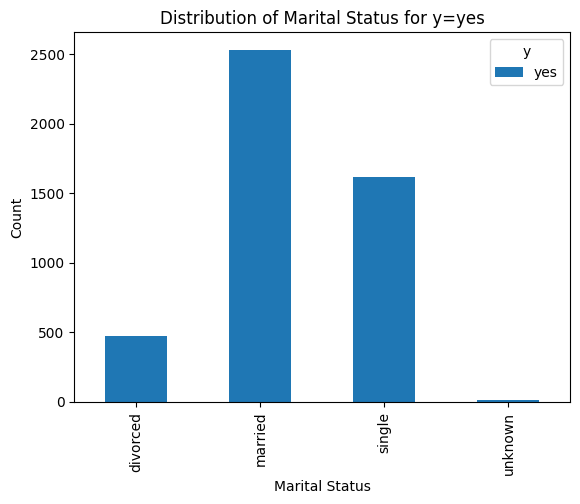

In [5]:
''' Recommended Strategy: It is advised that the bank focus its marketing efforts towards 
married couples, as they exhibit a higher likelihood of engaging in term purchases. ''' 

# Filter the DataFrame for rows where 'y' is 'yes'
filtered_df = df[df['y'] == 'yes']
# Create a crosstab between 'marital' and 'y'
cross_table = pd.crosstab(filtered_df['marital'], filtered_df['y'])
# Plotting a grouped bar chart
cross_table.plot(kind='bar', stacked=False)
# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status for y=yes')
# Show the plot
plt.show()


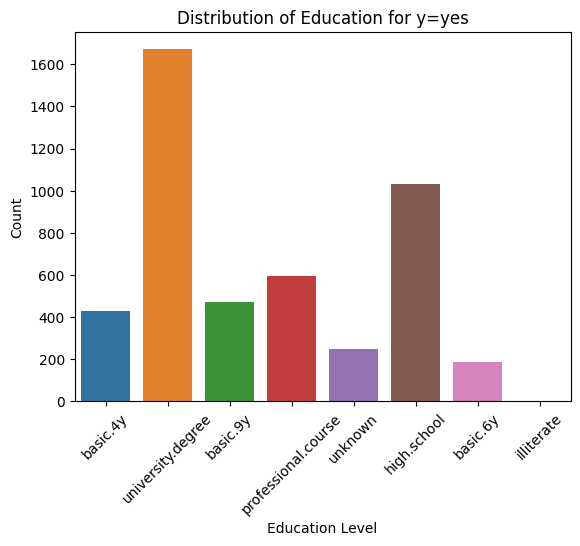

In [6]:
''' Recommended Strategy: It is advisable for the bank to direct its marketing efforts 
towards university graduates, as this demographic displays a higher propensity to engage 
in term purchases.'''  

# Create a count plot
sns.countplot(x='education', data=filtered_df)
# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)
# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education for y=yes')
# Show the plot
plt.show()

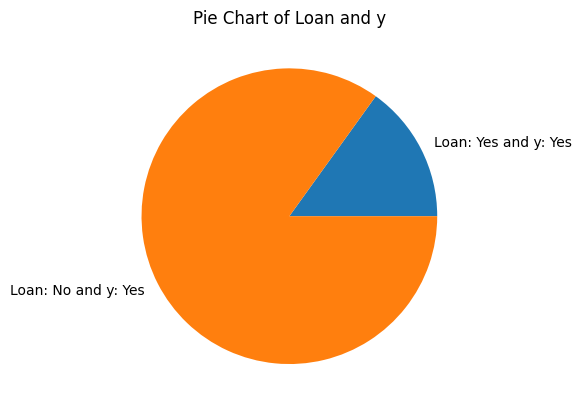

In [7]:
''' Recommended Strategy: The bank is encouraged to direct its marketing efforts towards individuals without 
outstanding loans, as this group exhibits a higher inclination to engage in term purchases. '''

# Filter the data as two groups: 1- with loan and y=yes, 2- without loan and y=yes
count_yes_loan_yes = ((df['loan'] == 'yes') & (df['y'] == 'yes')).value_counts().get(True, 0)
count_yes_loan_no = ((df['loan'] == 'no') & (df['y'] == 'yes')).value_counts().get(True, 0)
# Create numbers, labels and title for the chart
numbers = [count_yes_loan_yes, count_yes_loan_no]
labels = ['Loan: Yes and y: Yes', 'Loan: No and y: Yes']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of Loan and y')
# Show the chart
plt.show()

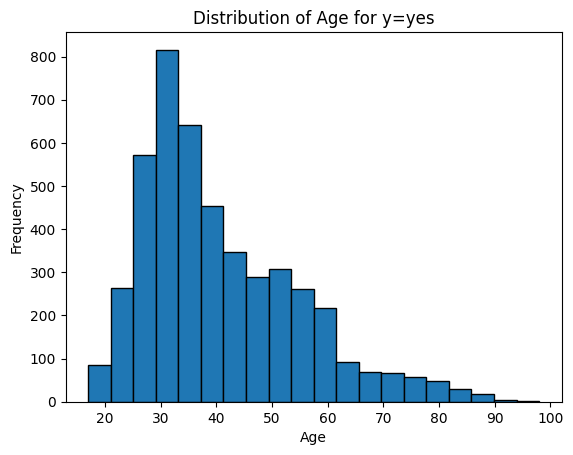

In [8]:
''' Recommended Strategy:The bank is encouraged to focus its marketing efforts on individuals 
in their late twenties to early forties, as this demographic is 
more inclined to engage in term purchases. '''

# Create a histogram
plt.hist(filtered_df['age'], bins=20, edgecolor='k')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for y=yes')
# Show the plot
plt.show()

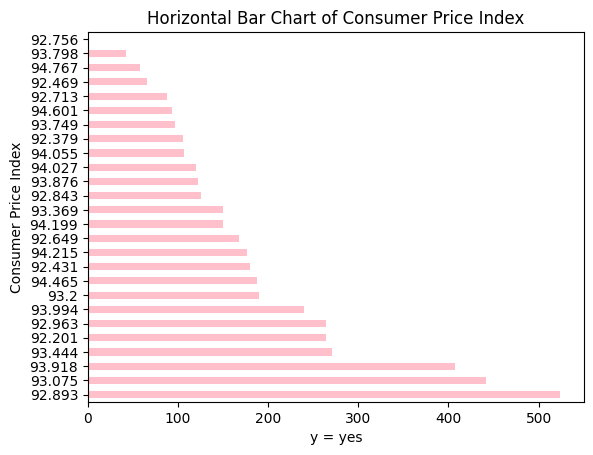

In [9]:
''' Recommended Strategy: The bank is advised to target individuals with higher Consumer Price Index,
 as they demonstrate a greater likelihood of engaging in term purchases. '''

# Get value counts of 'cons.price.idx'
cons_price_idx = filtered_df['cons.price.idx'].value_counts()
# Create a horizontal bar chart
cons_price_idx.plot(kind='barh', color='pink')
# Add labels and title
plt.ylabel('Consumer Price Index')
plt.xlabel('y = yes')
plt.title('Horizontal Bar Chart of Consumer Price Index')
# Show the plot
plt.show()

### Based on the analysis of the provided data, several key business recommendations can be formulated to enhance the bank's marketing strategy for term purchases.

##### Firstly, it is strongly recommended that the bank directs its marketing efforts towards married couples. The data indicates that married individuals have demonstrated a notably higher likelihood of engaging in term purchases. This target demographic should be a primary focus for the bank's promotional activities. Secondly, the bank should consider tailoring its marketing campaigns towards university graduates. This demographic has shown a higher propensity for term purchases, suggesting that targeting this educated group may yield more favorable results. Additionally, individuals without outstanding loans should be a priority in the bank's marketing strategy. This group exhibits a heightened inclination to engage in term purchases, making them a valuable segment to target. Moreover, the bank is encouraged to concentrate its marketing endeavors on individuals in their late twenties to early forties. This age group has exhibited a greater inclination to participate in term purchases, and targeting them may lead to increased engagement. Lastly, individuals with higher Consumer Price Index (CPI) values should be a focus of the bank's marketing efforts. The data suggests that those with elevated CPI values are more likely to engage in term purchases, making them a potentially lucrative target audience.

##### By implementing these recommended strategies, the bank can refine its marketing approach to better reach and engage potential customers for term purchases, ultimately contributing to increased business success.